# Import Libraries

In [3]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import yfinance as yf
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

%matplotlib inline
warnings.filterwarnings('ignore')

Hello


# Loading Dataset

In [5]:
df = pd.read_excel("/Users/Precious/PROJECTS/InfoTech Internship/ML Task 3/bank_data_1.xlsx")
print("df shape:", df.shape)
df.head()

df shape: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


# Data Pre-processing

In [7]:
df.size

864948

In [8]:
# Information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

From our information table, the column "month" has data type "object". Converting the data type to "datetime", we have :

In [10]:
# Converting the data type
df["month"] = pd.to_datetime(df["month"], format = '%b').dt.month_name()

In [11]:
# Information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
# Determining categorical and numerical column
# Categorical column
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical Columns:', cat_col)

# Numerical column
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical Columns:', num_col)

Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Numerical Columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [13]:
# Checking for duplicates in the DataFrame
duplicated_rows = df[df.duplicated(keep = False)]
print("Number of Duplicated rows before:", duplicated_rows.duplicated().sum())

Number of Duplicated rows before: 12


This signifies that these some informations were repeated and these informations will be dropped.

In [15]:
# Dropping duplicate rows
drop_duplicate = df.drop_duplicates(inplace = True)
print("Number of Duplicated rows after:", df.duplicated().sum())

Number of Duplicated rows after: 0


In [16]:
# Checking for missing values in the Data set
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

They are no missing values in our data set.

Inorder to prevent any statistical and measure error, we need to check if there exist outliers in the data set. To proceed we will be creating plots to find outliers.

In [19]:
num_col

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [20]:
# Statistical summary for numerical columns
df[num_col].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.017972
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.177913
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4964.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000


From our summary we can already see that there exist outliers in the data set. Let's create a boxplot to have a view of how the data points are plotted.

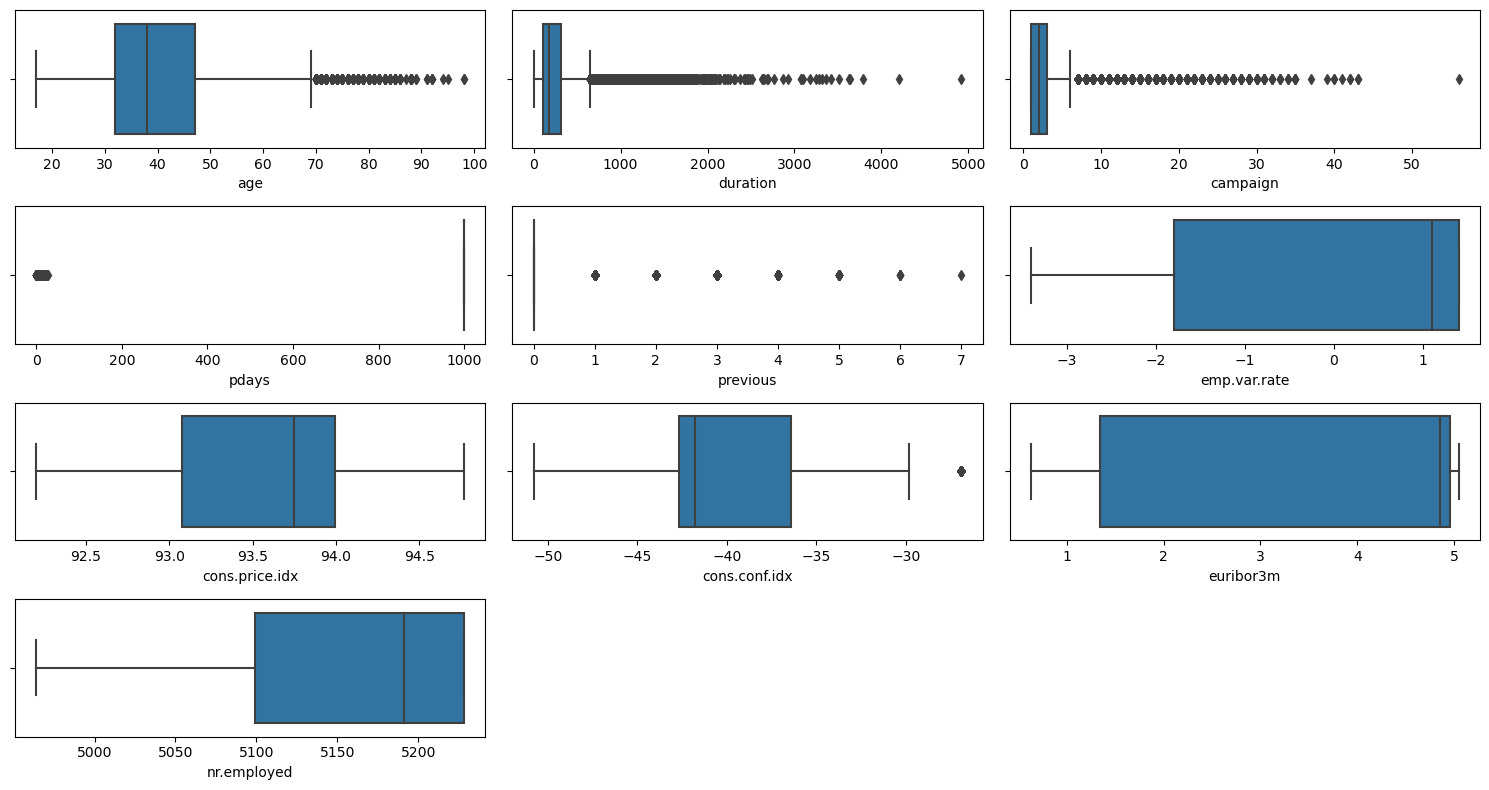

In [22]:
# Plotting box plots for each feature in the dataset
plt.subplots(figsize = (15, 8))

for i, col in enumerate(num_col):
    plt.subplot(4, 3, i+1)     # 3 is the number of rows, 4 is the number of columns, i+1 ensures that each boxplot is placed in its own separate subplot.
    sns.boxplot(df[col])
plt.tight_layout()
plt.show()

Most of the data feature have data points that significantly deviate from the rest of the data. By handling this outliers, we will remove them from the data set.

In [24]:
# Removing Outliers from each data feature
# 1) Duration
low, high = df["duration"].quantile([0.001, 0.99995])
mask_dur = df["duration"].between(low, high)

# 2) Campaign
mask_camp = df["campaign"] < 44

# 3) Pdays
mask_pdays = [np.log(x) for x in df["pdays"]]

df = df[mask_dur & mask_camp & mask_pdays]
print(df.shape)

(41123, 21)


Now that the outliers have been identified and removed we can now explore the data set.

# Exploratory Data Analysis

We will begin our exploration by looking at the distribution of the 'age' column.

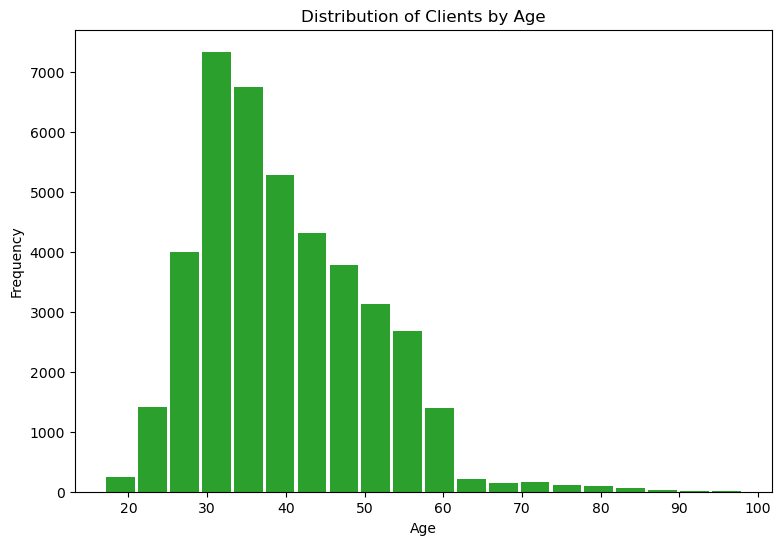

In [28]:
# Creating a Histogram
plt.figure(figsize = (9, 6))
plt.hist(df["age"], bins = 20, rwidth = 0.9, color = "C2")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Clients by Age")
plt.show();

- From our plot, we can observe that clients with age ranging between 23 and 60 highly participated in the campaign while clients with age 20 and age ranging between 61 and 98 that participated in the campaign were not many.
- We can also see that between the clients of age 23 and 60, clients with age 31 outnumbers the others i.e more than 7000.

Let's have a view of the job description of the clients.

In [31]:
df.job.value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object', name='job')

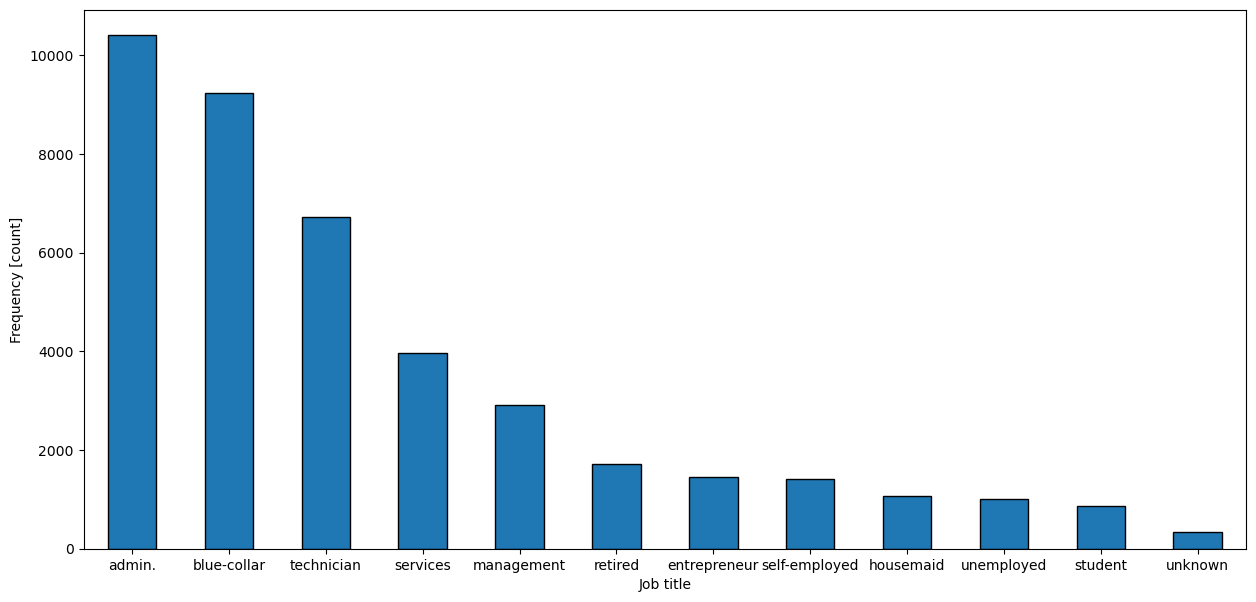

In [32]:
# Distribution of column 'job'
ax = df["job"].value_counts().plot(kind = 'bar', figsize = (15, 7), edgecolor = 'black')
ax.set_xlabel('Job title')
ax.set_ylabel('Frequency [count]')
plt.xticks(rotation = 0)

plt.show()

The job title "admin." has the highest count which means that majority of the clients participating in the campaign are admin. We can also see that some of the clients are unemployed and another group of these clients are students. We can observe that there exist another group of clients where their job title is not known *i.e of about 330*.

Now that we have seen the distribution of "age" and "job" columns, let's have a look at the first categorical column of the data set.

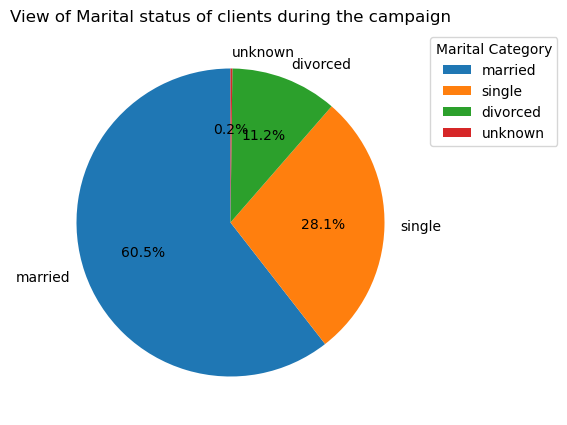

In [35]:
plt.figure(figsize = (7, 5))
marital = round(df["marital"].value_counts(normalize = True) * 100, 3)
# Creating Piechart 
plt.pie(marital, labels = marital.index, autopct='%1.1f%%', startangle = 90)
plt.legend(marital.index, title = 'Marital Category', loc = 'upper left', bbox_to_anchor = (1, 0, 0.5, 1))
plt.title('View of Marital status of clients during the campaign')
plt.show()

Most of the clients participating in the campaign are married and also, we see that 0.19% of the clients have unknown marital status. Let's have a view of the relationship between job and marital columns *i.e determining the numbers of clients for each job with respect to their marital status*. 

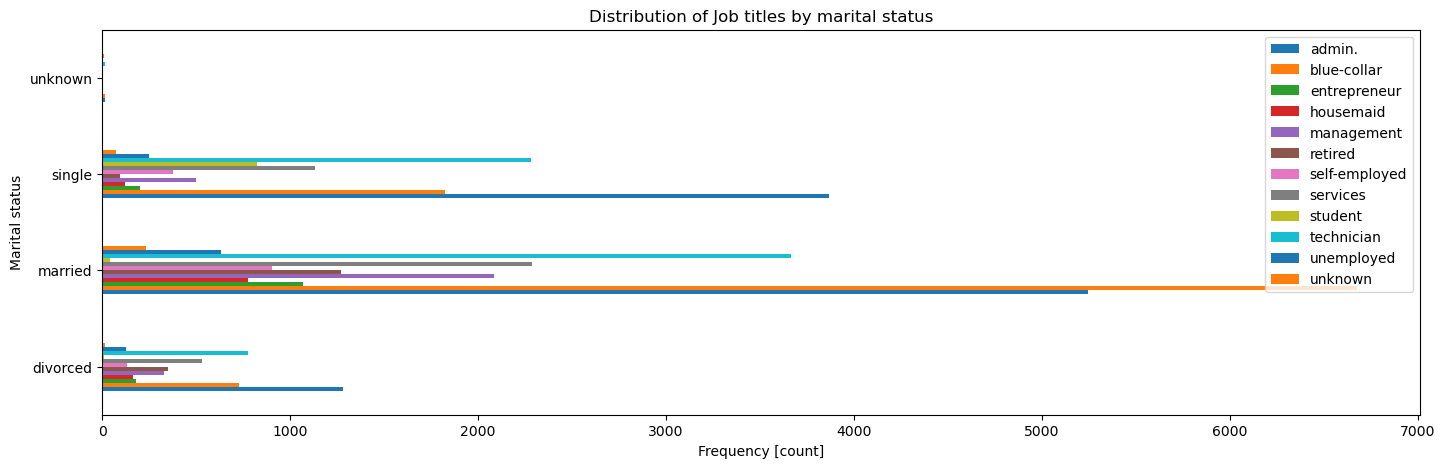

In [37]:
# Grouping the Data
group = df["job"].groupby(df["marital"]).value_counts()
group_stack = group.unstack(fill_value = 0)
# Creating bar chart
group_stack.plot(kind="barh", figsize=(17, 5))
plt.xlabel('Frequency [count]')
plt.ylabel('Marital status')  # Adjust label based on your data
plt.title("Distribution of Job titles by marital status")
plt.legend(loc = "upper right")
plt.show();

- We saw before that the job "admin." had the highest count and also, we saw that many clients that participated in the campaign were married. From our above graph, we can see that among the clients with different marital status, a high number of the clients work as *blue-collars* second by *admin.* who are married. 
- Among the clients with marital status single, majority of the clients have job title *admin.* second by *technicians*.
- Among the clients who are divorced, majority of the clients have job title *admin.* second by *technicians*.
- Among the clients whose marital status are not known, majority of the cients are *admin.* second by *blue-collars*.

We see that among the four categories of marital clients with job titles *admin.* have the highest count. We also recognized that in the divorce marital category, there are no counts for students and also only *admin., blue-collar, technician* and *unknown* have counts under the unknown marital category.

All these clients who participated in the campaign have different educational background and also, some of the clients are students which means that they are still going to school. This is where we will looking at the "education" column.

In [41]:
# Exploring the "education" column
df["education"].value_counts()

education
university.degree      12146
high.school             9496
basic.9y                6036
professional.course     5235
basic.4y                4174
basic.6y                2289
unknown                 1729
illiterate                18
Name: count, dtype: int64

From above, we can see that a majority of the clients pursue university degree and a minimum number of clients are illiterates, that is they have no educational background. We can see that there are three types of values under education column which looks the same i.e *basic.9y, basic.4y and basic.6y*. Let us group them and call them *"basic"*.

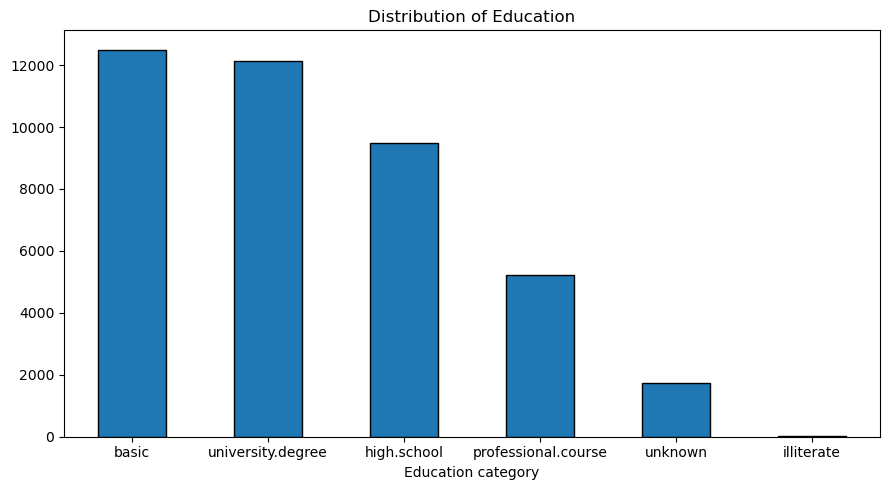

In [43]:
# Grouping basic.9y, basic.4y and basic.6y
df["education"] = np.where(df["education"] == 'basic.9y', 'basic', df["education"])
df["education"] = np.where(df["education"] == 'basic.6y', 'basic', df["education"])
df["education"] = np.where(df["education"] == 'basic.4y', 'basic', df["education"])

# Printing new column
df["education"].value_counts().plot(kind = 'bar',
                                   title = "Distribution of Education",
                                   edgecolor = "black",
                                   figsize = (9, 5)
                                )
plt.xlabel("Education category")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

Now that we have the distribution of education column, let's have a view of the distribution of the column "education" with respect to the the column "job".

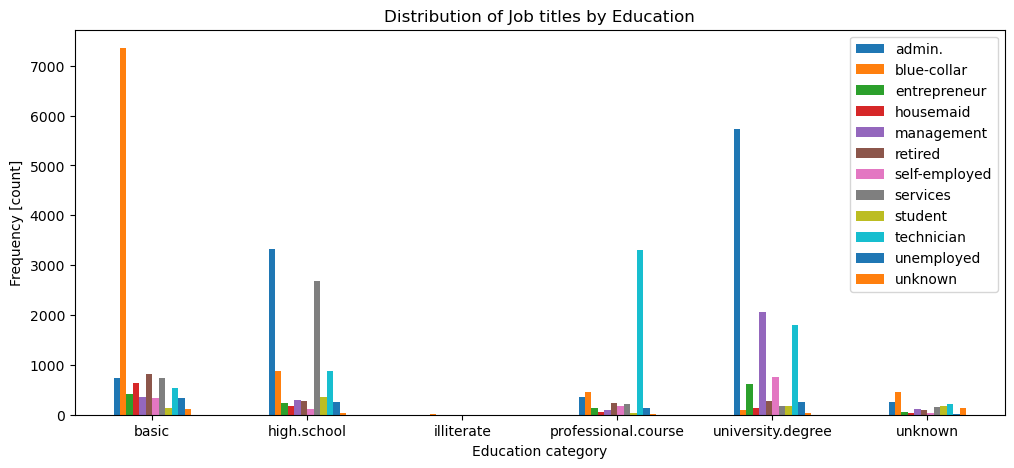

In [45]:
# Grouping the Data
group = df["job"].groupby(df["education"]).value_counts()
group_stack = group.unstack(fill_value = 0)
# Creating bar chart
group_stack.plot(kind="bar", figsize=(12, 5))
plt.xlabel('Education category')
plt.ylabel('Frequency [count]')  # Adjust label based on your data
plt.title("Distribution of Job titles by Education")
plt.legend(loc = "upper right")
plt.xticks(rotation = 0)
plt.show();

In this plot, we can see that a much higher proportion of clients with job "blue-collar" have only a basic education, while illiterate isn't common in any of the job except for "blue-collar".

The campaigns were based on phone calls and since it was based on phone calls, we will explore the column "contact".

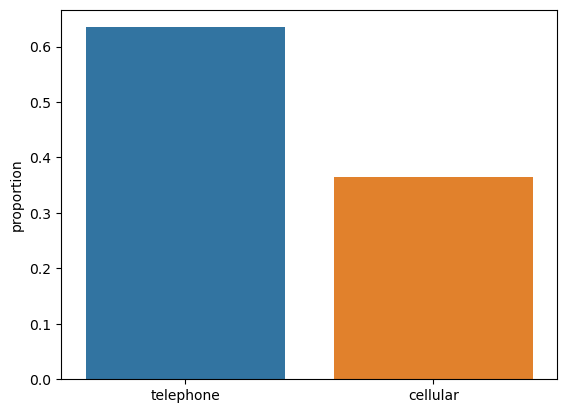

In [48]:
# Exploring the column "contact"
sns.barplot(x = df["contact"].unique(), y = df["contact"].value_counts(normalize = True), data = df)
plt.show()

In this plot, we can see that a much higher proportion of clients were contacted by telephone than cellular.

If we try to determine the rate at which clients with different job category were contacted by telephone and that were contacted by cellular, we would have a plot like:

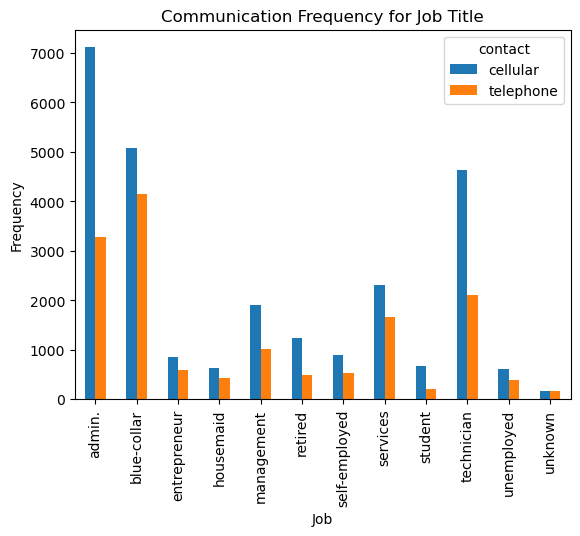

In [51]:
# Categorizing clients by contact 
pd.crosstab(df["job"], df["contact"]).plot(kind = 'bar')
plt.title('Communication Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.savefig('communication_fre_job')

Comparing the different job title across the telephone and cellular contact groups, we can see that a much more proportion of clients were contacted by cellular as compared to the proportion of clients contacted by telephone for all job title.

During the campaign, a large number of clients were contacted just once and also, only a client was contacted 37 times during the campaign. Let's have a view of the periods in which the clients were being contacted.

In [53]:
# Transforming the Data type of the column "month"
df["month"] = pd.to_datetime(df['month'], format='%B')

# Creating pivot table
camp_pivot = pd.pivot_table(data = df, index = 'month', values = 'campaign', aggfunc = np.sum)
camp_pivot

,campaign
month,
1900-03-01,1203
1900-04-01,5115
1900-05-01,33488
1900-06-01,16318
1900-07-01,22668
1900-08-01,16451
1900-09-01,1004
1900-10-01,1106
1900-11-01,7817


Let's have a view on the distribution of the number of times clients that were contacted during the campaign

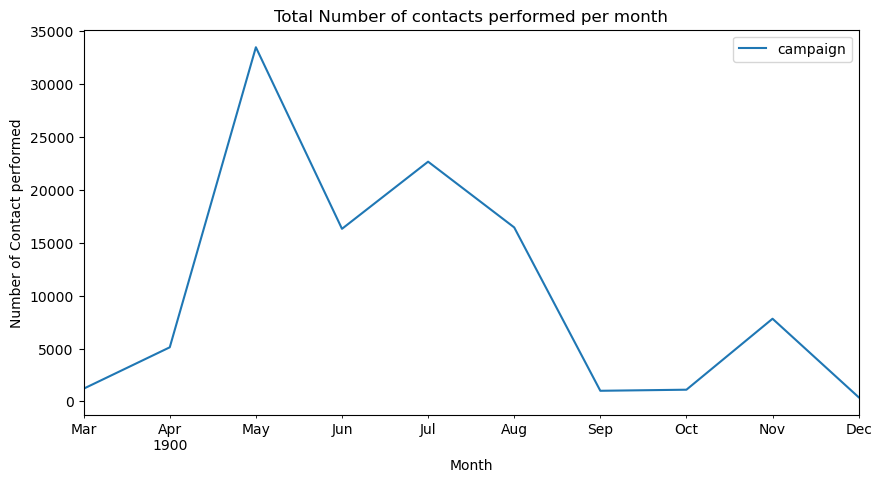

In [55]:
# Plot bar chart of `camp_pivot`
camp_pivot.plot(figsize = (10, 5))
plt.xlabel('Month')
plt.ylabel('Number of Contact performed')
plt.title("Total Number of contacts performed per month") ## 1900 isn't the actual year
plt.show();

- In the month of May, more contacts were performed compared to any other month during the campaign.
- There was a rise in the number of contact performed during the month of March, April, June, September and October due to the fact that most of the clients didn't participated in the campaign.

During the campaign, about 170 clients were contacted for 85 seconds. We notice that most of the calls that lasted for more that 1000 seconds was just operated for a client. Since the campaign was based on phone calls, let's determine the duration of last calls made for each day of the week per month.

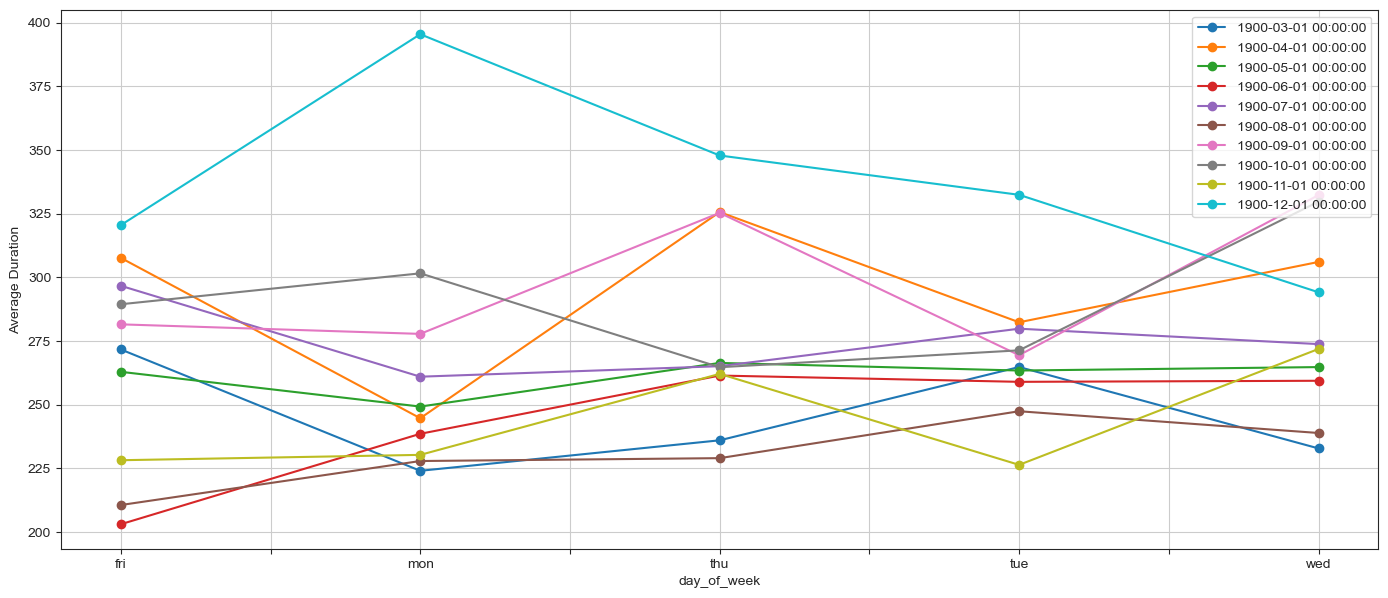

In [134]:
pd.pivot_table(data = df, index = 'day_of_week', values = 'duration', columns = 'month', aggfunc = np.mean).plot(figsize = (17, 7), marker = 'o')
plt.legend(loc = 'upper right')
plt.ylabel('Average Duration')
plt.grid(True)
plt.show()

- In the month of April, May and June, the highest call duration was performed on *Thursday*.
- In the month of March and August, the highest number of call duration was performed on *Tuesday*. 
- Comparing the variation of call duration for each month, the highest call was performed on *Monday* in the month of *December*.

Clients participating in this campaigns were contacted during the last campaign. We want to determine the number of days that passed by after the client with loans or without loans were last contacted from the previous campaign.

In [94]:
df["pdays"].groupby(df["loan"]).value_counts()  ## 999 means clients that weren't previously contacted 

loan     pdays
no       999      32666
         3          355
         6          343
         4           97
         7           52
         9           52
         2           50
         12          45
         10          41
         5           40
         13          29
         11          25
         15          21
         14          17
         0           12
         8           11
         16          10
         17           8
         18           6
         19           3
         22           3
         20           1
         21           1
         25           1
         26           1
         27           1
unknown  999        955
         3           10
         6            8
         10           4
         4            3
         7            2
         8            2
         9            2
         12           2
         2            1
yes      999       6015
         3           74
         6           61
         4           18
         12          11
 

- We see that a greater number of clients who didn't have a loan were not previously contacted as compared to the clients who have loans and whose loan record is unknown.
- We can also observe that the clients with highest number of days that passed by after he or she  was last contacted from a previous campaign didn't have a loan.

Let's compare the performance of this campaign and the previous campaign over time with respect to the number of contacts performed.

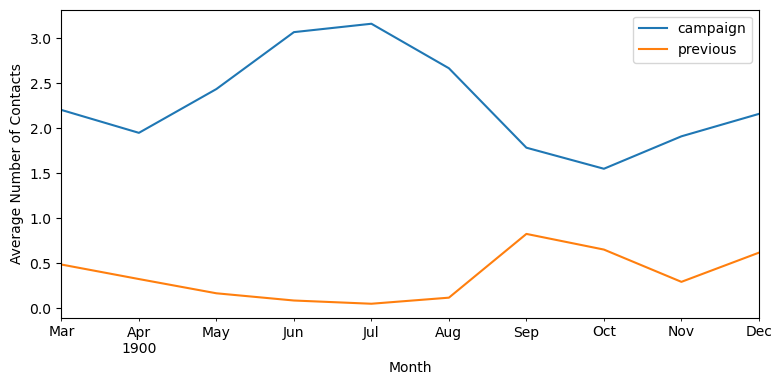

In [96]:
# Creating Pivot Tables
cur_pre_pivot = pd.pivot_table(data = df, index = 'month', values = ['campaign', 'previous'], aggfunc = np.mean)
# Creating Lineplot
cur_pre_pivot.plot(legend = True, figsize = (9, 4))
plt.xlabel('Month')
plt.ylabel('Average Number of Contacts')
plt.show();

- In the plot, the average number of contacts highly performed was done in the present campaign during the month of July due to the fact that the clients has a credit. During the previous campaign, the average number of contacts highly performed was during the month of September.
- In the plot, there is a decrease in the average number of contacts performed during the last marketing campaign between the month of March and July and a steady increase between July and August.

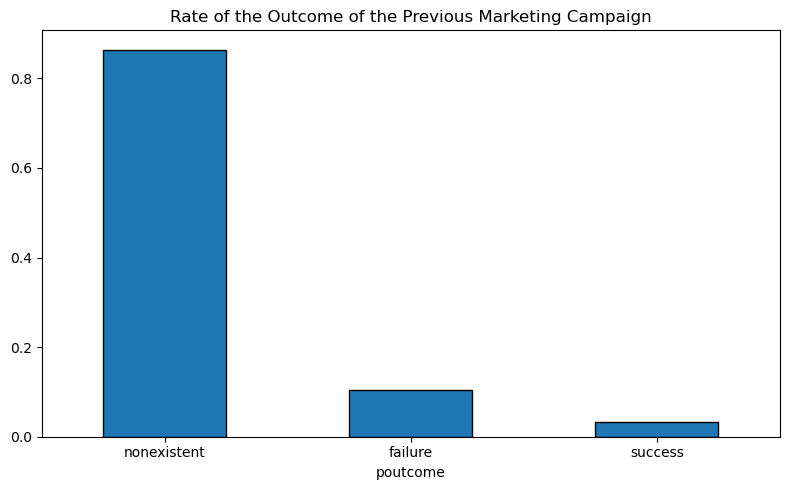

In [99]:
# Distribution of poutcome
df["poutcome"].value_counts(normalize = True).plot(kind = 'bar', figsize = (8, 5), edgecolor = 'black')
plt.title('Rate of the Outcome of the Previous Marketing Campaign')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

The rate of success of the previous marketing campaign was very low (i.e *for some clients the campaign was a success*) as compared to the failure rate and non-existent rate. This is because of the number of contacts performed durig the previous campaign.

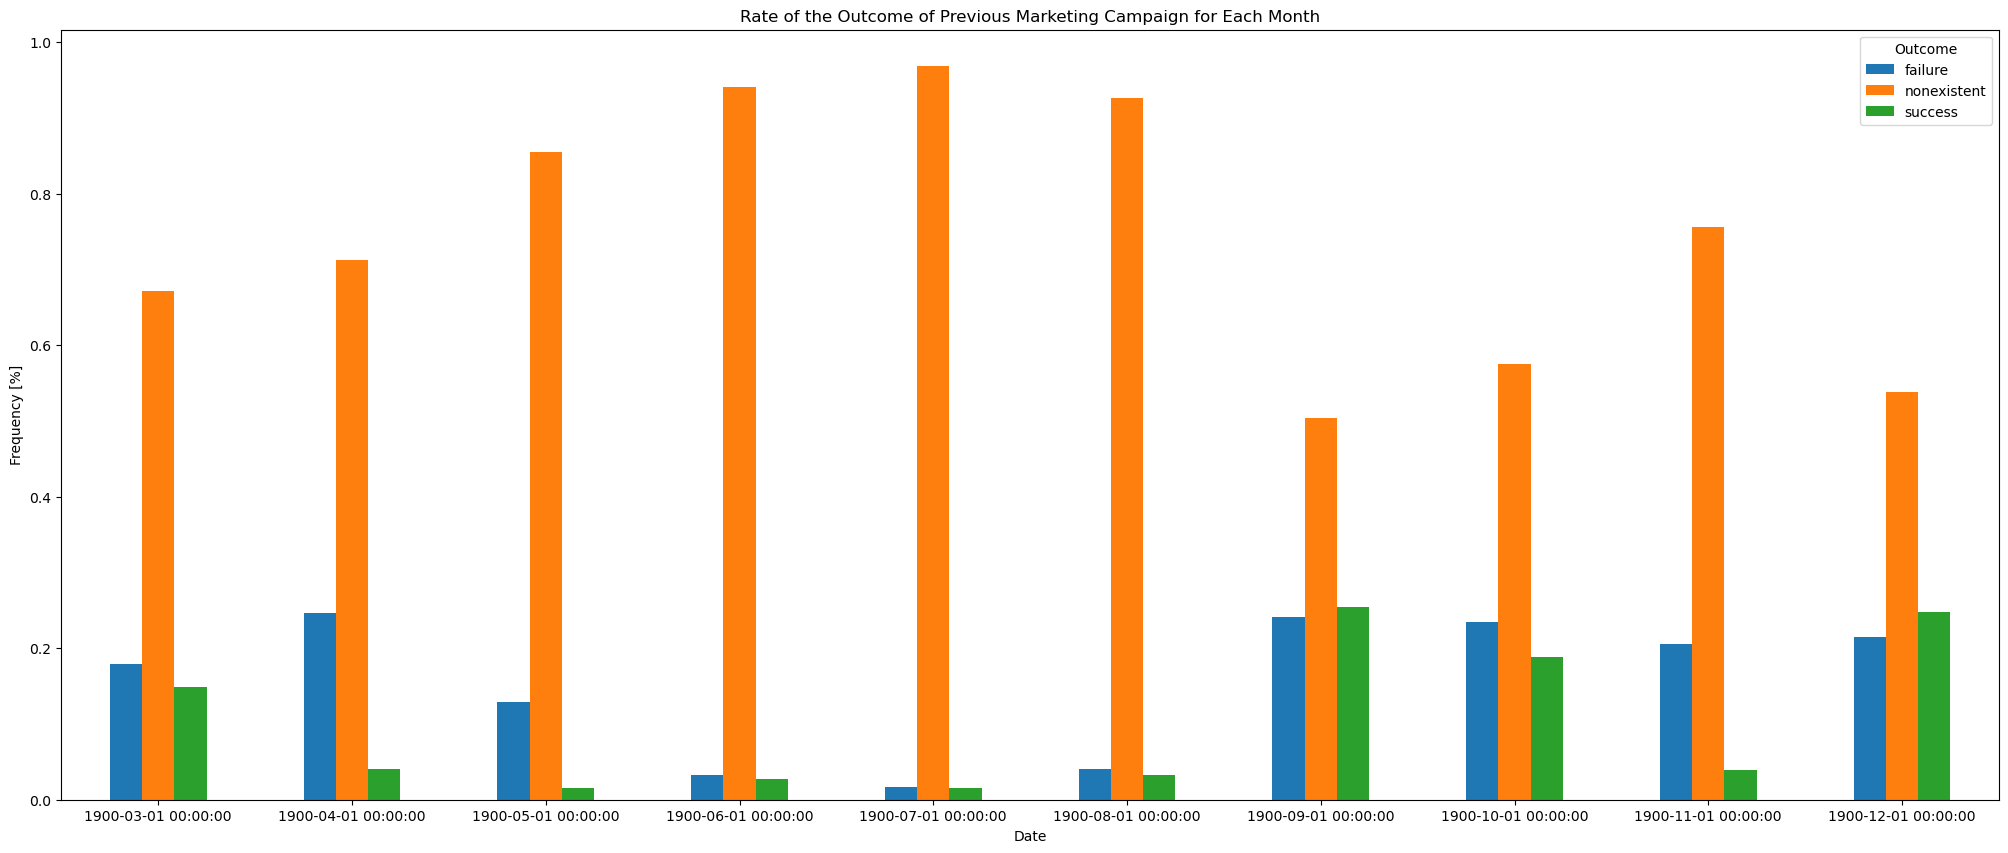

In [102]:
group = df["poutcome"].groupby(df["month"]).value_counts(normalize = True)
group_stack = group.unstack(fill_value = 0)

group_stack.plot(kind="bar", figsize=(25, 10))
plt.xlabel('Date')
plt.ylabel('Frequency [%]')  # Adjust label based on your data
plt.title('Rate of the Outcome of Previous Marketing Campaign for Each Month')
plt.legend(title = 'Outcome', loc = "upper right")
plt.xticks(rotation = 0)
plt.show();

In this plot, we can see that a much more proportion of the outcome of the previous marketing campaign was non-existent in all the month as compared to the proportion of the outcome of the previous marketing campaign which was failure and success. We can also observe that the highest proportion of success of the previous marketing campaign over time was in the month of September which is equal to the highest average number of contacts performed in month of September. This shows that the number of contacts performed during the previous campaign affected or influenced the success of the marketing campaign. 

**cons.price.idx**

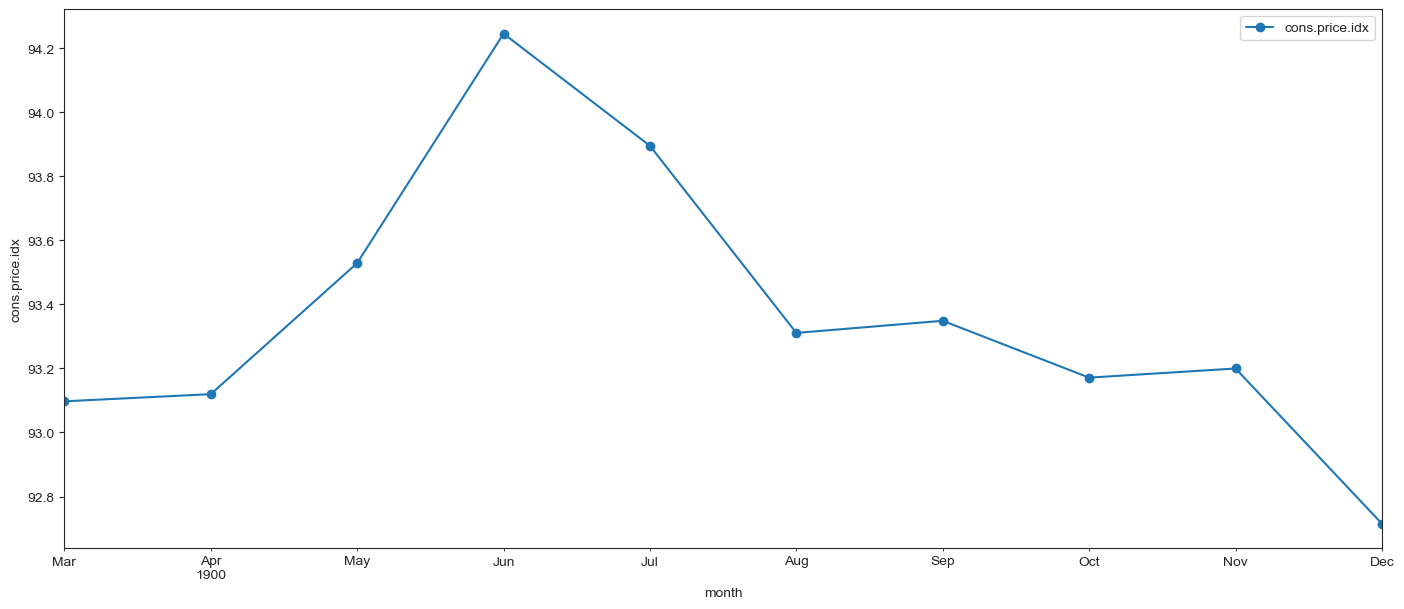

In [146]:
pd.pivot_table(data = df, index = 'month', values = 'cons.price.idx', aggfunc = np.mean).plot(figsize = (17, 7), marker = 'o')
plt.ylabel('cons.price.idx')
plt.show();

In [108]:
# Creating a pivot table
rate_pivot = pd.pivot_table(data = df, index = 'month', values = ['emp.var.rate', 'cons.conf.idx'], aggfunc = np.mean)
rate_pivot

,cons.conf.idx,emp.var.rate
month,,
1900-03-01,-42.650549,-1.800000
1900-04-01,-46.271429,-1.800000
1900-05-01,-40.577595,-0.164254
1900-06-01,-41.579387,0.688245
1900-07-01,-42.371498,1.159752
1900-08-01,-35.596466,0.749497
1900-09-01,-33.903020,-2.174423
1900-10-01,-34.541737,-2.444258
1900-11-01,-41.230809,-0.418373


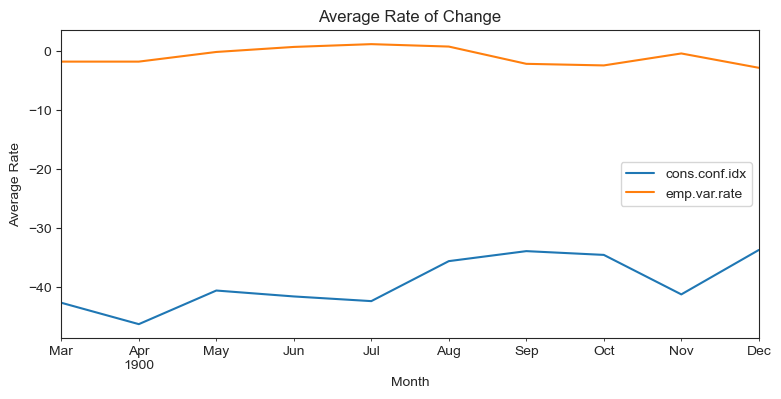

In [110]:
# Creating lineplot, 
rate_pivot.plot(legend = True, figsize = (9, 4))
plt.xlabel('Month')
plt.ylabel('Average Rate')
plt.title("Average Rate of Change")
plt.show();

- The average rate of consumer confidence index changes over time and also, there was a great peformance in the consumer confidence index in the month of December.
- We can also observe a constant change in the employment variation rate over time. The employment variation rate is well performed in the month of July.

**euribor3m**

Let us determine the distribution of clients who have subscribed to a term deposit or not.

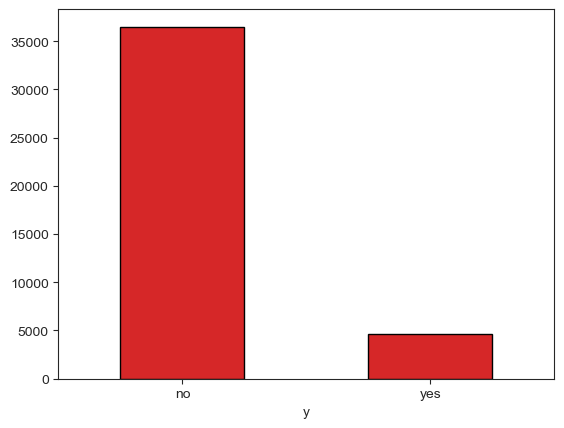

In [112]:
df["y"].value_counts().plot(kind = 'bar', edgecolor = 'black', color = 'C3')
plt.xticks(rotation = 0)
plt.show()

In order to obtain our prediction or the outcome of our prediction, the values of our target vector must be numeric. We will do that by transforming it.

In [148]:
# Transforming Data values into numeric
df['y'] = df['y'].replace('no', 0)
df['y'] = df['y'].replace('yes', 1)
print(df['y'].value_counts())

y
0    36493
1     4630
Name: count, dtype: int64


In [150]:
# Proportion of subscription
print("Percentage of non subscription:", df['y'].value_counts(normalize = True)[0] * 100)
print("Percentage of subscription:", df['y'].value_counts(normalize = True)[1] * 100)

Percentage of non subscription: 88.74109379179535
Percentage of subscription: 11.258906208204653


We can see that the data is imbalanced because the number of observation in the different clases is uneven. In order to solve the imbalance issue i.e to balance it, we will perform 'oversampling'. Before we go ahead to balance the classes, let's still perform some exploration.

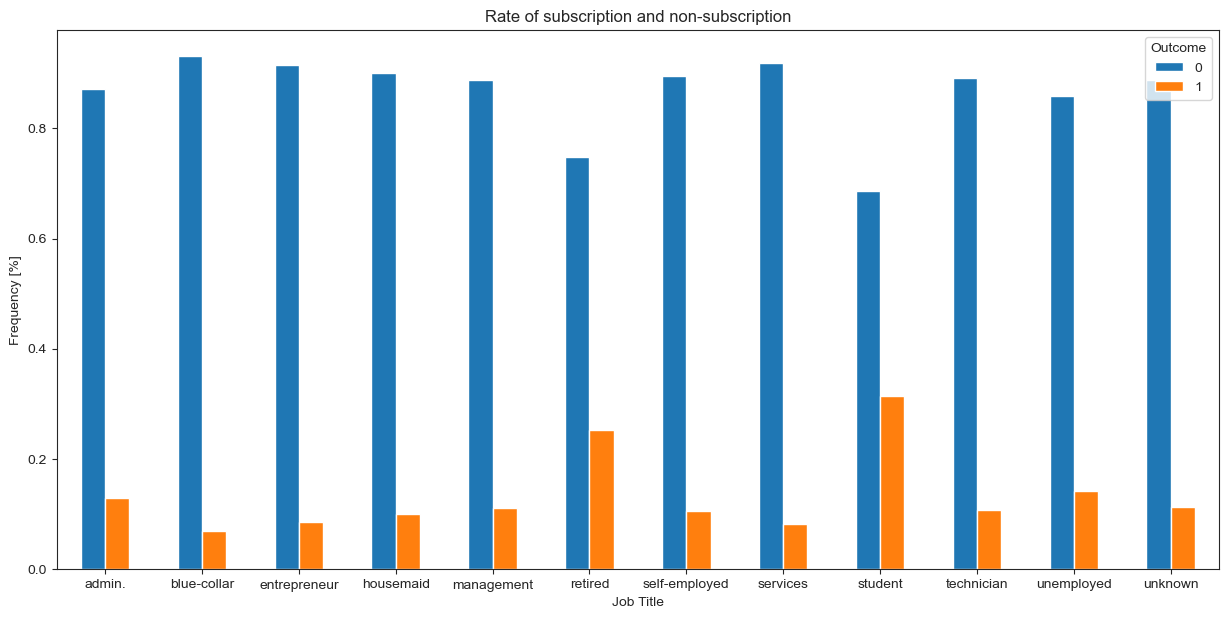

In [152]:
# Plotting barplot
group = df["y"].groupby(df["job"]).value_counts(normalize = True)
group_stack = group.unstack(fill_value = 0)

group_stack.plot(kind="bar", figsize=(15, 7))
plt.xlabel('Job Title')
plt.ylabel('Frequency [%]')  # Adjust label based on your data
plt.title('Rate of subscription and non-subscription')
plt.legend(title = 'Outcome', loc = "upper right")
plt.xticks(rotation = 0)
plt.show();

In this plot, we can explore a much more higher rate of clients who didn't subscribed to the term deposit for every job title as compared to rate of clients who subscribed to the term deposit.

Before we continue exploring the feature 'y', we need to select *feature matrix* and *target vector* in order to perform our prediction. We will begin by building a correlation map to determine the relationship between two features.

<AxesSubplot:>

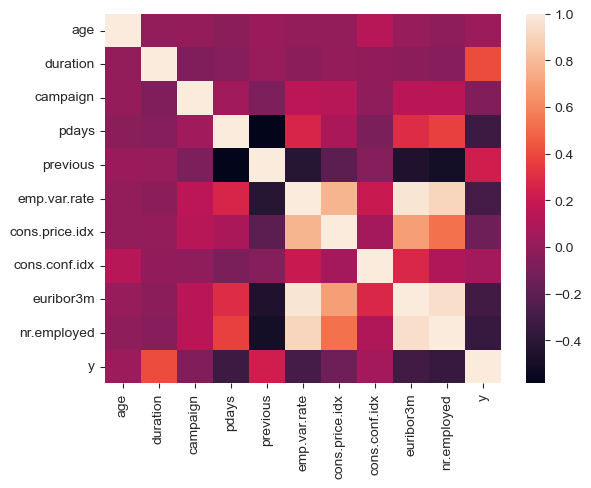

In [158]:
# Correlation Analysis
correlation = df.select_dtypes("number").corr()
sns.heatmap(correlation)

In [160]:
# Choosing the 'feature matrix' and the 'target vector' for building the model

# Feature matrix
features = ['age', 'job', 'duration', 'campaign', 'previous']
X = df[features]
print("Dimension of the independent variables:", X.shape)

# Target vector
target = 'y'
y = df[target]
print("Dimension of dependent variable:", y.shape)

Dimension of the independent variables: (41123, 5)
Dimension of dependent variable: (41123,)


Dividing our data into a training set and test set using a randomized train-test split in the ratio 80:20.

In [163]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size = 0.2, random_state = 42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (32898, 5)
y_train shape: (32898,)
X_test shape: (8225, 5)
y_test shape: (8225,)


Now that our data is splitted, it is time to over sample the imbalance data.

In [166]:
# Performing Over-sampling
over_sampler = RandomOverSampler(random_state = 42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

# Checking information
print("Length of oversampled data:", len(X_train_over))
print("Number of Non-subscription in oversampled data:", len(y_train_over[y_train_over == 0]))
print("Number of Non-subscription in oversampled data:", len(y_train_over[y_train_over == 1]))
print("Proportion of Non-subscription in oversampled data:", y_train_over.value_counts(normalize = True)[0])
print("Proportion of subscription in oversampled data:", y_train_over.value_counts(normalize = True)[1])

Length of oversampled data: 58310
Number of Non-subscription in oversampled data: 29155
Number of Non-subscription in oversampled data: 29155
Proportion of Non-subscription in oversampled data: 0.5
Proportion of subscription in oversampled data: 0.5


# Building Model

**Iterate**

Our data has already been splitted. We will be building and implementing the model.

In [171]:
# # Creating a pipeline that contains a transformer and a predictor

# Build model
# Fit on `X_train`, `y_train`
model_reg = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    LogisticRegression(max_iter = 1000)
)
model_reg.fit(X_train, y_train)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    LogisticRegression(max_iter = 1000)
)    
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['job'], use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

For us to evaluate the performance of our model, we will determine how well it performs when making predictions for data. We will start by making predictions on the test set result.

In [173]:
# Performing our prediction
y_pred = model_reg.predict(X_test)
y_pred_over = model_over.predict(X_test)

for m in [model_reg, model_over]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.8973
Test Accuracy: 0.9007
Training Accuracy: 0.8196
Test Accuracy: 0.818


In [176]:
acc_baseline = y_test.value_counts(normalize = True).max()
print("Baseline accuracy:", round(acc_baseline, 2))

Baseline accuracy: 0.89


In [178]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix_over = metrics.confusion_matrix(y_test, y_pred_over)

print("cnf_matrix:", cnf_matrix)
print("cnf_matrix_over", cnf_matrix_over)

cnf_matrix: [[7192  146]
 [ 671  216]]
cnf_matrix_over [[6050 1288]
 [ 209  678]]


Here is the confusion matrix in the form of an array object. Let's visualize the results of the model in the form of a confusion matrix.

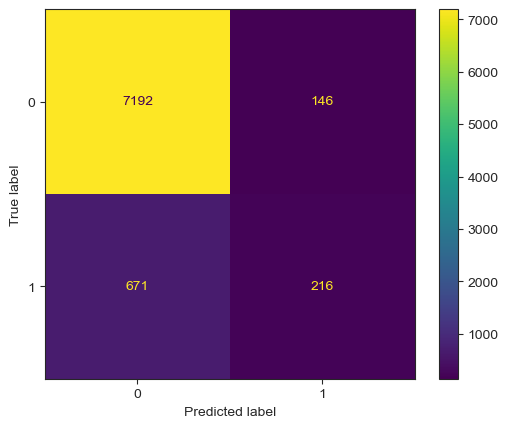

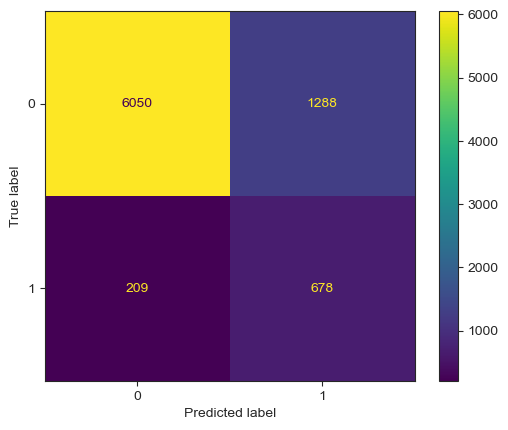

In [181]:
ConfusionMatrixDisplay.from_estimator(model_reg, X_test, y_test);
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test);

Let's evaluate the model using classification_report for accuracy, precision and recall.

In [184]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7338
           1       0.60      0.24      0.35       887

    accuracy                           0.90      8225
   macro avg       0.76      0.61      0.65      8225
weighted avg       0.88      0.90      0.88      8225



Well, we got a classification rate of about 88% which is considered as a good accuracy.

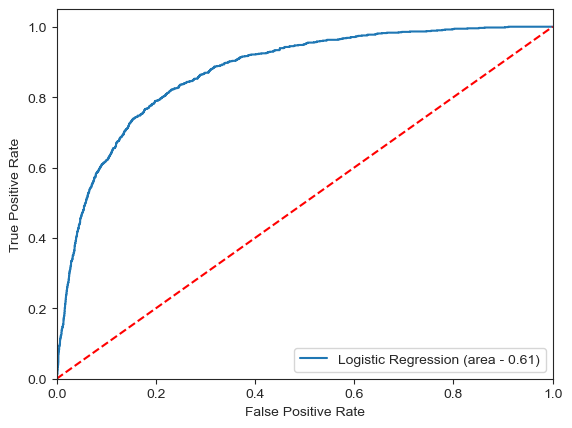

In [187]:
logit_roc_auc = roc_auc_score(y_test, model_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area - %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

AUC score for the case is 0.61.